# PYTHON CHEATSHEET

## Import
Modules can be imported in a generic (`import ___`), selective (`from ___ import ___`) and universal (`from ___ import *`) way with or without defining an alias (`___ as ___`). Generic import is preferred over selective (ref:DataCamp) and universal imports should be avoided for a clear namespace. Some common aliases are: 
> `numpy as np`, `statsmodel as sm`, `seaborn as sns`, `pyplot as plt`, `pandas as pd`

Generic w/o alias: /content 
Generic w alias: [0 1 2 3] 
Universal w/o alias: 5.0 
Selective w/o alias: 2022-03-25 03:44:17.650214 
Selective w alias: [<matplotlib.lines.Line2D object at 0x7f6fc4f46a50>]


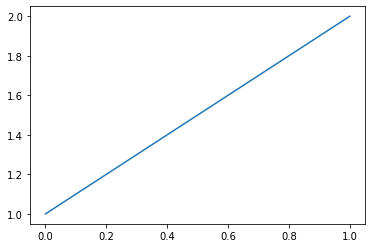

In [ ]:
# generic import without alias (call function with module name)
import os
# generic import with alias (call function with module name)
import numpy as np
# selective import without alias (call function without module name)
from datetime import datetime
# selective import with alias (call function without module name)
from matplotlib import pyplot as plt
# universal import without alias (call function without module name)
from math import *

print("Generic w/o alias:", os.getcwd(), "\nGeneric w alias:", np.array([0,1,2,3]), "\nUniversal w/o alias:", sqrt(25), "\nSelective w/o alias:", datetime.today(), "\nSelective w alias:", plt.plot([1, 2]))

---
# Variables
While defining variables, Python enforces some rules: 
must start with a letter. You can use a capital letter, but we usually use 

* Must start with a letter (usually lowercase)
* After first letter, can use letters/numbers/underscores
* No spaces or special characters (/-!: etc.)
* Case sensitive (`my_var` is different from `MY_VAR`)


In [ ]:
height = 24                   # integer represents integer numbers
weight = 75.5                 # float represents real numbers
name = 'Bayes'                # string represent text (double or single quotes)
breed = "Golden Retriever"
isDog = True                  # boolean keeps True or False

# display variable and variable type
print(height, type(height))
print(weight, type(weight))
print(name, type(name))
print(breed, type(breed))
print(isDog, type(isDog))

24 <class 'int'>
75.5 <class 'float'>
Bayes <class 'str'>
Golden Retriever <class 'str'>
True <class 'bool'>


---
# Functions

**Define** a function: `def function_name(positional_argument, keyword_argument=default_value)`

**Call** a function: `function_name(positional_argument, keyword_argument)`

**Methods** are object functions and are called: `object_name.function_name(positional_argument, keyword_argument)`


> Keyword arguments can be passed with keywords as assignment if the order is not preserved.



In [ ]:
def display_info(name, age, gender="female", isStudent=True):
  print(name, "is a", gender, "at age", age, "and is", end="")
  if(isStudent): print("a student.")
  else: print(" not a student.")

display_info("Joe", 24, isStudent=False)
display_info("John", 25, "male", False)

Joe is a female at age 24 and is not a student.
John is a male at age 25 and is not a student.


Call a function with `help(function_name)` or `?funcion_name` to display function info.

In [ ]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



## Arbitrary Arguments, *args
If the number of arguments is unknown, add a * before the parameter name. The function will receive a *tuple* of arguments and used for *positional arguments*. "args" is a name which can be replaced by any.


In [ ]:
# define function with arbitrary arguments
def my_sum(*args):
    result = 0
    # iterate over the args tuple
    for x in args:
        result += x
    return result

# call function with arbitrary arguments
my_sum(1,2,3,4,5)

15

In [ ]:
s = set([3, 1, 5, 0])
print(s.add(0))

None



## Arbitrary Keyword Arguments, **kwargs
If the number of keyword (named) arguments is unknown, add a double ** before the parameter name. The function will receive a *dictionary* of arguments and used to replace *keyword arguments*. "kwargs" is a name which can be replaced by any and should always be defined after args.

In [ ]:
# define function with arbitrary keyword arguments
def my_concat(**kwargs):
    result = ""
    # iterate over the kwargs dictionary
    for arg in kwargs.values():
        result += arg
    return result

my_concat(a="This ", b="is ", c="a ", d="function", e="!")

'This is a function!'